In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import os

# ---------------------------------------------------------------------------------------------------
# Load the dataset

path = "/Volumes/dax-hd/project-data/search-files/merged-data.csv"
save_folder = "/Volumes/dax-hd/project-data/images/all_arch_pca"

plot_path = os.path.join('all_arch_pca')

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

df = pd.read_csv(path)

# ---------------------------------------------------------------------------------------------------
# variable data

cath_ids = {
    1: {
        10: 'orthogonal_bundle', 20: 'up_down_bundle', 25: 'alpha_horseshoe', 40: 'alpha_solenoid', 50: 'alpha_alpha_barrel'
    },
    2: {
        10: 'ribbon', 20: 'single_sheet', 30: 'beta_roll', 40: 'beta_barrel', 50: 'clam', 60: 'sandwich', 70: 'distorted_sandwich',
        80: 'trefoil', 90: 'orthogonal_prism', 100: 'aligned_prism', 102: 'three_layer_sandwich', 105: 'three_propeller',
        110: 'four_propeller', 115: 'five_propeller', 120: 'six_propeller', 130: 'seven_propeller', 140: 'eight_propeller',
        150: 'two_solenoid', 160: 'three_solenoid', 170: 'beta_complex', 180: 'shell'
    },
    3: {
        10: 'alpha_beta_roll', 15: 'super_roll', 20: 'alpha_beta_barrel', 30: 'two_layer_sandwich', 40: 'three_layer_aba_sandwich',
        50: 'three_layer_bab_sandwich', 55: 'three_layer_bba_sandwich', 60: 'four_layer_sandwich', 65: 'alpha_beta_prism', 70: 'box',
        75: 'five_stranded_propeller', 80: 'alpha_beta_horseshoe', 90: 'alpha_beta_complex', 100: 'ribosomal_protein_l15_chain_k_domain_two'
    },
    4: {
        10: 'irregular'
    },
    6: {
        10: 'helix_non_globular', 20: 'other_non_globular'
    }
}

# ---------------------------------------------------------------------------------------------------
# Add the architecture name to df

def add_architecture_name(df):

    def get_arch_name(row):
        class_num = row['Class number']
        arch_num = row['Architecture number']
        try:
            name = f"{cath_ids[class_num][arch_num]} ({class_num},{arch_num})"
            return name
        except KeyError:
            return "Unknown"
    
    df['architecture_name'] = df.apply(get_arch_name, axis=1)
    
    return df

df = add_architecture_name(df)

cols = df.columns.tolist()
cols.insert(1, cols.pop(cols.index('architecture_name')))
df_merged = df[cols]

selected_columns = [
    "hydrophobic_fitness",
    "isoelectric_point",
    "charge",
    "mass",
    "num_residues",
    "packing_density",
    "budeff_total",
    "evoef2_ref_total", 
    "dfire2_total",
    "rosetta_total",
    "aggrescan3d_avg_value"
]

# ---------------------------------------------------------------------------------------------------

df_selected = df[selected_columns]

df_selected_cleaned = df_selected.dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected_cleaned)

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

pca_df.to_csv('pca_results.csv', index=False)

pca_df['architecture_name'] = df['architecture_name'][df_selected_cleaned.index].reset_index(drop=True)

print("Variance explained by each component:")
print(pca.explained_variance_ratio_)

# ---------------------------------------------------------------------------------------------------


plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
cumulative_variance_plot_path = os.path.join(save_folder, 'cumulative_explained_variance.png')
plt.savefig(cumulative_variance_plot_path)
plt.close()

# ---------------------------------------------------------------------------------------------------


plt.figure(figsize=(30, 20))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['architecture_name'], palette='Spectral', legend='full')
plt.title('PCA on Dataset by Protein Architecture')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Architecture', bbox_to_anchor=(1.05, 1), loc='upper left')
scatter_plot_path = os.path.join(save_folder, 'pca_scatter_plot_by_architecture.png')
plt.savefig(scatter_plot_path)
plt.close()

# ---------------------------------------------------------------------------------------------------


for i in range(num_components_to_visualize):
    plt.figure(figsize=(10, 6))
    component_loadings = pca.components_[i]
    indices = np.argsort(abs(component_loadings))[::-1]
    plt.bar(feature_names[indices], component_loadings[indices])
    plt.xticks(rotation=90)
    plt.title(f'PCA Component {i+1} Loadings')
    plt.ylabel('Loading Value')
    feature_contribution_path = os.path.join(save_folder, f'pca_component_{i+1}_loadings.png')
    plt.tight_layout()
    plt.savefig(feature_contribution_path)
    plt.close()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

IndexError: single positional indexer is out-of-bounds

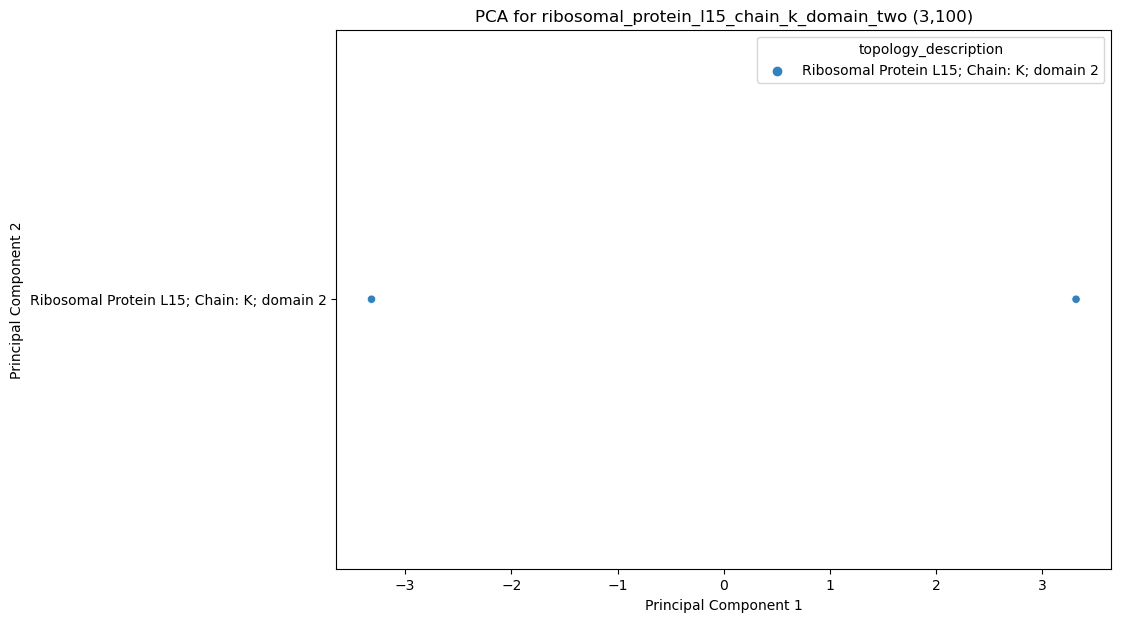

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import os
import json

# ---------------------------------------------------------------------------------------------------
# Load the dataset

path = "/Volumes/dax-hd/project-data/search-files/merged-data.csv"
base_save_folder = "/Volumes/dax-hd/project-data/images/pca_architectures_by_topology"
cath_dict_path = "/Volumes/dax-hd/project-data/search-files/cath-archetype-dict.txt"

df = pd.read_csv(path)

with open(cath_dict_path, 'r') as file:
    cath_dict = json.load(file)

# ---------------------------------------------------------------------------------------------------
# Add the architecture name to df

def add_topology_description(df, cath_dict):
    def get_topology_description(row):
        class_num = str(row['Class number'])
        arch_num = str(row['Architecture number'])
        top_num = str(row['Topology number'])
        try:
            description = cath_dict[class_num][arch_num][top_num]['description']
            return description
        except KeyError:
            return "Unknown"
    
    df['topology_description'] = df.apply(get_topology_description, axis=1)
    return df

# ---------------------------------------------------------------------------------------------------

df = add_topology_description(df, cath_dict)

if not os.path.exists(base_save_folder):
    os.makedirs(base_save_folder)

selected_columns = [
    "hydrophobic_fitness",
    "isoelectric_point",
    "charge",
    "mass",
    "num_residues",
    "packing_density",
    "budeff_total",
    "evoef2_ref_total",
    "dfire2_total",
    "rosetta_total",
    "aggrescan3d_avg_value"
]

# ---------------------------------------------------------------------------------------------------

for architecture_name in df['architecture_name'].unique():
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_filtered = df[df['architecture_name'] == architecture_name]
    df_selected = df_filtered[selected_columns]
    df_selected_cleaned = df_selected.dropna()
    
    if df_selected_cleaned.empty:
        continue

    save_folder = os.path.join(base_save_folder, architecture_name.replace('/', '_'))
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    
    # Standardize and PCA
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_selected_cleaned)
    pca = PCA(n_components=0.95)
    principal_components = pca.fit_transform(scaled_features)
    pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
    pca_df['topology_description'] = df_filtered['topology_description'][df_selected_cleaned.index].reset_index(drop=True)
    
    # ---------------------------------------------------------------------------------------------------
    # Plotting

    plt.figure(figsize=(10, 7))
    unique_topologies = pca_df['topology_description'].unique()
    palette = sns.color_palette('tab20c', n_colors=len(unique_topologies))
    topology_color_mapping = {topology: color for topology, color in zip(unique_topologies, palette)}

    scatter_plot = sns.scatterplot(
        x=pca_df.iloc[:, 0], y=pca_df.iloc[:, 1],
        hue=pca_df['topology_description'], palette=topology_color_mapping
    )
    plt.title(f'PCA for {architecture_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    #Cloud hue
    for topology, group_df in pca_df.groupby('topology_description'):
        if len(group_df) >= 3:
            sns.kdeplot(
                x=group_df.iloc[:, 1], y=group_df.iloc[:, 2], 
                color=topology_color_mapping[topology],
                levels=5, fill=True, alpha=0.5
            )

    # Handling legend
    handles, labels = scatter_plot.get_legend_handles_labels()
    plt.legend([],[], frameon=False)
    plt.savefig(os.path.join(save_folder, 'pca_scatter_by_topology.png'), bbox_inches='tight')
    plt.close()

    # Save legend separately
    fig_legend = plt.figure(figsize=(3, 4))
    plt.figlegend(handles, labels, loc='center')
    plt.savefig(os.path.join(save_folder, 'legend.png'), bbox_inches='tight')
    plt.close(fig_legend)

    # Plotting cumulative variance
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.tight_layout()
    cumulative_variance_plot_path = os.path.join(save_folder, 'cumulative_explained_variance.png')
    plt.savefig(cumulative_variance_plot_path)
    plt.close()

    #Component loading plot
    for i in range(pca.n_components_):
        plt.figure(figsize=(10, 6))
        component_loadings = pca.components_[i]
        indices = np.argsort(abs(component_loadings))[::-1]
        feature_names = np.array(selected_columns)[indices]
        plt.bar(range(len(indices)), component_loadings[indices])
        plt.xticks(range(len(indices)), feature_names, rotation=90)
        plt.title(f'PCA Component {i+1} Loadings')
        plt.ylabel('Loading Value')
        feature_contribution_path = os.path.join(save_folder, f'pca_component_{i+1}_loadings.png')
        plt.tight_layout()
        plt.savefig(feature_contribution_path)
        plt.close()

# ---------------------------------------------------------------------------------------------------
